# Import 

In [1]:
from keras import layers
from keras.layers import Input, Dense,Flatten
from keras.models import Model, Sequential
from keras.datasets import mnist

import itertools

from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt

In [2]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


# Train

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2803 - val_loss: 0.1921
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1723 - val_loss: 0.1549
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1454 - val_loss: 0.1349
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1278 - val_loss: 0.1204
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1175 - val_loss: 0.1120
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1104 - val_loss: 0.1061
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1052 - val_loss: 0.1017
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1014 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0988 - val_loss: 0.0965
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0971 - val_loss: 0.0952

In [7]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

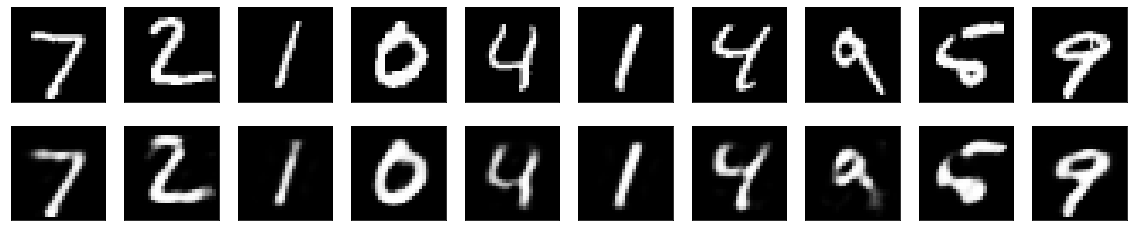

In [8]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Part I 

In [9]:
n = len(encoded_imgs)
sumOfTest = []
sumOfDecoded = []

#for each image (encoded and decoded) find the sum of all of the pixels 
#10000 images 
for i in range(n):
    summedTest = sum(x_test[i])
    summedDecoded = sum(decoded_imgs[i])
    
    #add the summed pixels (integer) to array (10000x1)
    sumOfTest.append(summedTest)
    sumOfDecoded.append(summedDecoded)
    

sumOfTest = np.array(sumOfTest)
sumOfDecoded = np.array(sumOfDecoded)

#difference between test(encoded images) and decoded images 
difference = sumOfTest - sumOfDecoded
print('diff',difference)

diff [ -1.62514528  -5.68960479  -0.53055373 ...   1.487708   -13.97983695
   9.49379044]


In [10]:
#create dictionary to map each index to its error value 
Dict = {}

for i in range(len(difference)): 
    #contains 10,000 indices with respective errors 
    Dict[i] = difference[i]
    
#sort the dictionary from smallest # (highest error) to lowest error 
sorting = dict(sorted(Dict.items(), key=lambda item: item[1]))

#choose the top ten highest errors from Dictionary 
x = dict(itertools.islice(sorting.items(), 10))
print('Highest Error Images:',x)

Highest Error Images: {8561: -24.671433114433, 9494: -22.878208675490754, 665: -20.699291595663993, 8570: -19.913747928432116, 4547: -19.20403600073014, 5153: -17.852923588741675, 6057: -17.08738182866435, 2669: -16.7369256694422, 9377: -16.510660718952238, 1995: -16.37598409436535}


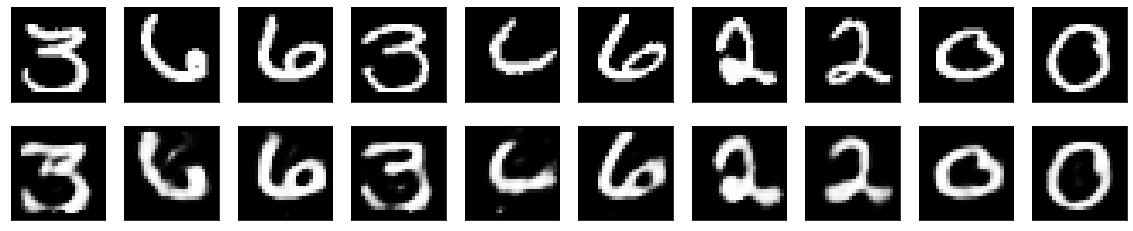

we can see some of the reconstructed images are very low quality in comparison to the original images.
For example images 1 and 5 (numbers 4 and 6 respectively) share the general shape with the original images but have a lot of noise


In [11]:
#turn dictionary into list of indices that contain highest error images 
indices = list(x)
#images displayed
n = len(indices)  

plt.figure(figsize=(20, 4))
for i in range(len(indices)):
    #display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[indices[i]].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()    

print('we can see some of the reconstructed images are very low quality in comparison to the original images.')
print('For example images 1 and 5 (numbers 4 and 6 respectively) share the general shape with the original images but have a lot of noise')

# Part II 

In [62]:
#read in data 
test = np.random.rand(100000, 30)

In [63]:
test[0]

array([0.18006454, 0.55502222, 0.27288232, 0.64287583, 0.94934877,
       0.0278359 , 0.11738379, 0.41057802, 0.08185935, 0.75965262,
       0.32148389, 0.76260317, 0.57429946, 0.89783374, 0.04568753,
       0.88602221, 0.65225593, 0.38228655, 0.08588702, 0.30779586,
       0.3977633 , 0.78348077, 0.91074354, 0.77384539, 0.15371734,
       0.31403603, 0.65668317, 0.5585711 , 0.81093695, 0.50742972])

# Part 2.1 Vanilla Autoencoder
## Number of hidden layers nodes = 2
## 1 Layer 

In [64]:
# number of hidden layers 
encoding_dim = 2

# input dimensions 
input_img = Input(shape=(30,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# lossy reconstruction of the input
# tanh produces better results than sigmoid 
decoded = Dense(30, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [65]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [66]:
#split training and testing data 
x_train, x_test, = train_test_split(test, test_size=0.1, random_state=42)
#get classes for training and testing 


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print (x_train.shape)
print (x_test.shape)

(90000, 30)
(10000, 30)


In [67]:
# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=100,
                shuffle=True)

autoencoder.summary()

Epoch 1/10
900/900 [==============================] - 1s 743us/step - loss: 0.6887
Epoch 2/10
900/900 [==============================] - 1s 820us/step - loss: 0.6826
Epoch 3/10
900/900 [==============================] - 1s 739us/step - loss: 0.6821
Epoch 4/10
900/900 [==============================] - 1s 737us/step - loss: 0.6820
Epoch 5/10
900/900 [==============================] - 1s 772us/step - loss: 0.6819
Epoch 6/10
900/900 [==============================] - 1s 727us/step - loss: 0.6819
Epoch 7/10
900/900 [==============================] - 1s 768us/step - loss: 0.6818
Epoch 8/10
900/900 [==============================] - 1s 757us/step - loss: 0.6818
Epoch 9/10
900/900 [==============================] - 1s 889us/step - loss: 0.6818
Epoch 10/10
900/900 [==============================] - 1s 816us/step - loss: 0.6817
Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLay

# Part 2.3/ 2.4
### Histogram for Vanilla Autoencoder 

In [74]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)

print(x_test[207])
print(decoded[207])

[0.42202547 0.49115387 0.9225654  0.8874823  0.19123456 0.06809029
 0.12786444 0.3399069  0.14976655 0.38498974 0.49298105 0.33693713
 0.47859    0.32057515 0.75022095 0.29893392 0.05997148 0.47531074
 0.73676974 0.85654175 0.00191674 0.2708202  0.04078928 0.67841816
 0.80155116 0.47543734 0.741426   0.8088848  0.86546516 0.10172255]
[0.48744005 0.5126683  0.5269814  0.5853971  0.4942495  0.3908105
 0.45692253 0.6022935  0.509541   0.47863638 0.5500137  0.51126546
 0.5001049  0.44320637 0.51591027 0.6063554  0.44825798 0.5662143
 0.4987202  0.4482413  0.47465855 0.5629127  0.47026962 0.39364392
 0.47674027 0.47783822 0.50789744 0.52533424 0.4427812  0.43341202]


In [76]:
#error values for autoencoder w/ 1 layer 
error1 = np.sum(x_test - decoded, axis = 1)

# Part 2.2 Deep Autoencoder
## Number of hidden layer nodes = 2 
## 2 Layers 

In [85]:
# number of hidden layers 
encoding_dim_1 = 2
encoding_dim_2 = 2


# input dimensions 
input_img = Input(shape=(30,))

# encoded representation of the input
encoded_1 = Dense(encoding_dim_1, activation='relu')(input_img)
encoded_2 = Dense(encoding_dim_2, activation='relu')(encoded_1)


# lossy reconstruction of the input
# sigmoid activation function produces bad results, tanh is better 
decoded_1 = Dense(encoding_dim_1, activation='relu')(encoded_2)
decoded_2 = Dense(30, activation='sigmoid')(decoded_1)


autoencoder = Model(input_img, decoded_2)


encoder2 = Model(input_img, encoded_2)
# encoded input into the decoder
encoded_input = Input(shape=(encoding_dim_2,)) 



decoder_layer_1 = autoencoder.layers[-2]
decoder_layer_2 = autoencoder.layers[-1]

decoder2 = Model(encoded_input, decoder_layer_2(decoder_layer_1(encoded_input)))


In [86]:
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

In [87]:
#split training and testing data 
x_train, x_test, = train_test_split(test, test_size=0.1, random_state=42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [88]:
# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                batch_size=100,
                shuffle=True)

autoencoder.summary()

Epoch 1/10
900/900 [==============================] - 1s 822us/step - loss: 0.6895
Epoch 2/10
900/900 [==============================] - 1s 795us/step - loss: 0.6878
Epoch 3/10
900/900 [==============================] - 1s 795us/step - loss: 0.6876
Epoch 4/10
900/900 [==============================] - 1s 800us/step - loss: 0.6876
Epoch 5/10
900/900 [==============================] - 1s 780us/step - loss: 0.6875
Epoch 6/10
900/900 [==============================] - 1s 806us/step - loss: 0.6875
Epoch 7/10
900/900 [==============================] - 1s 825us/step - loss: 0.6875
Epoch 8/10
900/900 [==============================] - 1s 803us/step - loss: 0.6875
Epoch 9/10
900/900 [==============================] - 1s 812us/step - loss: 0.6875
Epoch 10/10
900/900 [==============================] - 1s 822us/step - loss: 0.6875
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLay

In [89]:
encoded = encoder2.predict(x_test)
decoded = decoder2.predict(encoded)

In [90]:
# error values for 2 hidden layer network 
error2 = np.sum(x_test - decoded, axis = 1)
print(max(error2))

6.3901896


# Histogram of Reconstruction Errors for Layer =1 and Layer = 2 

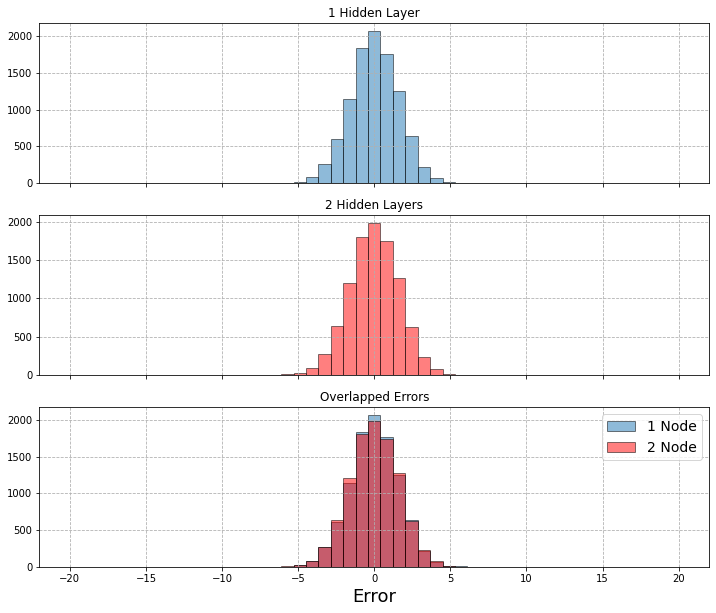

In [91]:

bins = np.linspace(-20, 20, 50)


fig, ax = plt.subplots(3, figsize = (12, 10), sharex = True)
ax[0].hist(error1, bins = bins, edgecolor = 'black', alpha = 0.5, label = '1 Node')
ax[0].grid(linestyle = '--')
ax[0].set_title('1 Hidden Layer')

ax[1].hist(error2, bins = bins, color = 'red', edgecolor = 'black', alpha = 0.5, label = '2 Node')
ax[1].grid(linestyle = '--')
ax[1].set_title('2 Hidden Layers')

ax[2].hist(error1, bins = bins, edgecolor = 'black', alpha = 0.5, label = '1 Node')
ax[2].hist(error2, bins = bins, color = 'red', edgecolor = 'black', alpha = 0.5, label = '2 Node')
ax[2].legend(fontsize = 14)
ax[2].set_xlabel('Error', fontsize = 18)
ax[2].grid(linestyle = '--')
ax[2].set_title('Overlapped Errors')


plt.show()

In [92]:
print(np.average(error1), np.std(error1))
print(np.average(error2), np.std(error2))

-0.0019508774 1.5660173
-0.019897424 1.5883126


we can see from the histogram that the autoencoder with one hidden layer has a higher loss than the autoencoder with two hidden layers